This exercise will read the image and then show dominant colors by using kmeans methode

In [1]:
import matplotlib.image as img

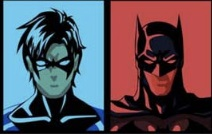

In [2]:
image = img.imread('001.jpg')

In [3]:
image.shape

(135, 212, 3)

In [4]:
image

array([[[ 13,   0,   0],
        [ 19,   4,   0],
        [  7,   1,   5],
        ...,
        [ 67,  12,  15],
        [ 57,  21,  25],
        [ 22,   2,   4]],

       [[  4,   0,   0],
        [  7,   2,   6],
        [ 13,  17,  29],
        ...,
        [144,  76,  75],
        [123,  75,  73],
        [ 52,  21,  19]],

       [[  1,   9,  12],
        [  0,   0,  12],
        [  0,   8,  28],
        ...,
        [174,  89,  84],
        [153,  90,  83],
        [ 60,  15,   9]],

       ...,

       [[  9,   4,  10],
        [  4,   1,   8],
        [  4,   3,   9],
        ...,
        [  5,   1,   2],
        [  5,   1,   2],
        [  7,   3,   4]],

       [[ 17,  21,  22],
        [ 21,  22,  24],
        [ 24,  25,  27],
        ...,
        [ 22,  20,  21],
        [ 22,  20,  21],
        [ 23,  21,  22]],

       [[249, 255, 255],
        [249, 255, 255],
        [250, 255, 252],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 253, 254]]

In [5]:
r = []
g = []
b = []

for row in image:
    for pixel in row:
            tmp_r, tmp_g, tmp_b = pixel
            r.append(tmp_r)
            g.append(tmp_g)
            b.append(tmp_b)
        

In [6]:
g.count

<function list.count(value, /)>

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame({'red': r, 'blue': b, 'green': g})

In [9]:
df.head()

,red,blue,green
0,13,0,0
1,19,0,4
2,7,5,1
3,41,67,60
4,54,104,94


In [10]:
df.shape

(28620, 3)

In [11]:
from scipy.cluster.vq import whiten

In [12]:
df['scaled_red'] = whiten(df['red'])

In [13]:
df.head()

,red,blue,green,scaled_red
0,13,0,0,0.176958
1,19,0,4,0.258631
2,7,5,1,0.095285
3,41,67,60,0.558100
4,54,104,94,0.735058


In [14]:
df['scaled_green'] = whiten(df['green'])
df['scaled_blue'] = whiten(df['blue'])

In [15]:
df.head()

,red,blue,green,scaled_red,scaled_green,scaled_blue
0,13,0,0,0.176958,0.000000,0.000000
1,19,0,4,0.258631,0.053314,0.000000
2,7,5,1,0.095285,0.013329,0.057960
3,41,67,60,0.558100,0.799713,0.776670
4,54,104,94,0.735058,1.252883,1.205577



Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


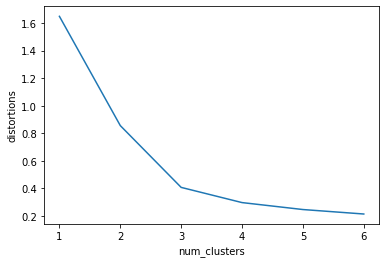

In [16]:
import pandas as pd
import seaborn as sns
from scipy.cluster.vq import kmeans
from matplotlib import pyplot as plt

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [17]:
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_blue', 'scaled_green']], 3)

In [18]:
cluster_centers

array([[0.2327727 , 0.22664973, 0.18936232],
       [2.39276813, 0.89984427, 1.04933365],
       [1.68506738, 2.51214546, 2.51508982]])

In [19]:
distortion

0.4072653362479038

Recall that we use whiten() to normalize the RGB values. Now we want to convert scaled RGB values to raw values, and then convert them to the range of 0-1, using the following formula: converted_pixel = standardized_pixel * pixel_std / 255

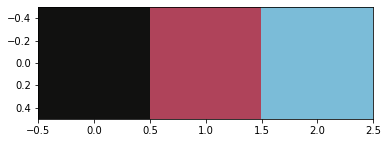

In [20]:
# Get standard deviations of each color
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
colors = []

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()